Lambda School Data Science

*Unit 4, Sprint 1, Module 4*

---

# Topic Modeling (Prepare)

# Latent Dirchilet Allocation (LDA) Models (Prepare)
<a id="#p1"></a>

## Overview
LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Follow Along

## Challenge 

# Estimating LDA Models with Gensim (Learn)
<a id="#p1"></a>

## Overview
### A Litterary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [2]:
path = './data/austen-brontë-split'

In [3]:
import os

def gather_data(path_to_data): 
    data = []
    
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            data.append(tokenize(str(text)))
            
    return data

In [12]:
df['tokens'] = gather_data(path)

In [13]:
"this is a sample string with a \n newline character".replace('\n', '')

'this is a sample string with a  newline character'

In [14]:
df['tokens'].head()

Austen_Emma0000    [emma, jane, austen, volume, chapter, emma, wo...
Austen_Emma0001    [taylor, wish, pity, weston, thought, agree, p...
Austen_Emma0002    [behaved, charmingly, body, punctual, body, be...
Austen_Emma0003    [native, highbury, born, respectable, family, ...
Austen_Emma0004    [mention, handsome, letter, weston, received, ...
Name: tokens, dtype: object

## Follow Along

### Text Preprocessing
**Challenge**: update the function `tokenize` with any technique you have learned so far this week. 

In [8]:
titles = [t[:-4] for t in os.listdir(path)]

In [9]:
titles[:5]

['Austen_Emma0000',
 'Austen_Emma0001',
 'Austen_Emma0002',
 'Austen_Emma0003',
 'Austen_Emma0004']

In [4]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [5]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

### Author DataFrame


In [10]:
df = pd.DataFrame(index=titles)

In [11]:
df.head()

""
Austen_Emma0000
Austen_Emma0001
Austen_Emma0002
Austen_Emma0003
Austen_Emma0004


In [14]:
#

ValueError: invalid literal for int() with base 10: 'ckpo'

In [15]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [16]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [17]:
df.author.value_counts()

0    441
1    372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [18]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            tokens = tokenize(str(text))
            yield tokens

In [19]:
streaming_data = doc_stream(path)

In [20]:
print(streaming_data)

<generator object doc_stream at 0x0000020E2AE70D48>


### Gensim LDA Topic Modeling

In [21]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream(path))

In [22]:
id2word.token2id['girl']

387

In [23]:
id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))

[(2753, 1), (3986, 3), (6601, 1), (6818, 1)]

In [24]:
import sys
sys.getsizeof(id2word)

56

In [25]:
len(id2word.keys())

22095

In [26]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [27]:
len(id2word.keys())

8102

In [28]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]

In [29]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [30]:
lda.print_topics()

[(0,
  '0.016*"harriet" + 0.015*"emma" + 0.009*"weston" + 0.008*"elton" + 0.008*"good" + 0.008*"think" + 0.008*"man" + 0.007*"miss" + 0.007*"knightley" + 0.006*"know"'),
 (1,
  '0.006*"like" + 0.006*"sir" + 0.006*"jane" + 0.006*"thought" + 0.005*"little" + 0.005*"good" + 0.005*"love" + 0.004*"old" + 0.004*"poor" + 0.004*"man"'),
 (2,
  '0.011*"elinor" + 0.009*"marianne" + 0.008*"elizabeth" + 0.007*"sister" + 0.007*"miss" + 0.005*"time" + 0.005*"darcy" + 0.005*"mother" + 0.005*"soon" + 0.005*"lady"'),
 (3,
  '0.005*"hand" + 0.005*"eyes" + 0.005*"john" + 0.004*"like" + 0.004*"saw" + 0.004*"asked" + 0.004*"little" + 0.003*"time" + 0.003*"know" + 0.003*"sir"'),
 (4,
  '0.014*"miss" + 0.011*"jane" + 0.008*"emma" + 0.008*"know" + 0.007*"thing" + 0.007*"think" + 0.006*"good" + 0.006*"little" + 0.006*"shall" + 0.006*"dear"'),
 (5,
  '0.007*"jane" + 0.006*"elizabeth" + 0.006*"darcy" + 0.006*"know" + 0.005*"wickham" + 0.005*"think" + 0.004*"miss" + 0.004*"good" + 0.004*"love" + 0.004*"letter"'),

In [31]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [32]:
topics = [' '.join(t[0:5]) for t in words]

In [33]:
for t in topics: 
    print(t)
    print("\n")

harriet emma weston elton good


like sir jane thought little


elinor marianne elizabeth sister miss


hand eyes john like saw


miss jane emma know thing


jane elizabeth darcy know wickham


hunsden miss helen temple bread


little madame like monsieur vous


burns thought like scatcherd miss


man bennet young elizabeth collins


like little thought long good


emma miss knightley harriet thing


bretton know dr little lucy


thousand mason like know sisters


lydia mother wickham father uncle




## Challenge 

You will apply an LDA model to a customer review dataset to practice the fitting and estimation of LDA. 

# Interpret LDA Results (Learn)
<a id="#p3"></a>

## Overview

## Follow Along

### Topic Distance Visualization

In [34]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [35]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.086109 -0.006008       1        1  41.976734
2      0.096106  0.014838       2        1  19.396479
4      0.069379 -0.064267       3        1  11.418604
7     -0.123732 -0.057420       4        1   8.034661
0      0.113208 -0.084783       5        1   4.911815
11     0.103097 -0.091143       6        1   4.027949
5      0.114385  0.018410       7        1   3.994224
14     0.103918  0.106251       8        1   1.489576
1     -0.011588  0.029208       9        1   1.013518
8     -0.097039 -0.021388      10        1   0.999442
3     -0.142886  0.006040      11        1   0.770558
9      0.073179  0.104524      12        1   0.767084
12    -0.028001 -0.056611      13        1   0.646024
6     -0.102658  0.024924      14        1   0.297363
13    -0.081258  0.077425      15        1   0.255977, topic_info=    Category         Freq    Term        Total  loglift  logprob
403  Default  1327.000000    like  1327.000000  30.0000  30.0000
159  Default  1716.000000  little  1716.000000  29.0000  29.0000
183  Default  1508.000000    miss  1508.000000  28.0000  28.0000
399  Default  1421.000000    know  1421.000000  27.0000  27.0000
86   Default   819.000000    emma   819.000000  26.0000  26.0000
..       ...          ...     ...          ...      ...      ...
148  Topic15     1.964197    jane   907.805664  -0.1681  -6.0124
856  Topic15     1.899381   heard   621.640320   0.1770  -6.0460
260  Topic15     1.874979    soon   922.447693  -0.2306  -6.0589
135  Topic15     1.863701   house   758.746338  -0.0413  -6.0650
356  Topic15     1.821975   doubt   313.732727   0.8192  -6.0876

[1129 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7784      1  0.737192  abandon
7784     15  0.184298  abandon
792       3  0.230587    abbey
792       5  0.658820    abbey
792       6  0.098823    abbey
...     ...       ...      ...
611      12  0.024409    young
611      13  0.009154    young
611      14  0.001526    young
8084      1  0.113948    zelie
8084      4  0.854609    zelie

[4298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 3, 5, 8, 1, 12, 6, 15, 2, 9, 4, 10, 13, 7, 14])

### Overall Model / Documents

In [36]:
lda[corpus[0]]

[(2, 0.23459491), (11, 0.7633975)]

In [37]:
distro = [lda[d] for d in corpus]

In [38]:
distro[0]

[(2, 0.234597), (11, 0.7633954)]

In [39]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [40]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

In [41]:
df.head()

,harriet emma weston elton good,like sir jane thought little,elinor marianne elizabeth sister miss,hand eyes john like saw,miss jane emma know thing,jane elizabeth darcy know wickham,hunsden miss helen temple bread,little madame like monsieur vous,burns thought like scatcherd miss,man bennet young elizabeth collins,like little thought long good,emma miss knightley harriet thing,bretton know dr little lucy,thousand mason like know sisters,lydia mother wickham father uncle,author
Austen_Emma0000,0.000000,0.0,0.234599,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.763393,0.000000,0.0,0.0,Austen
Austen_Emma0001,0.339857,0.0,0.000000,0.0,0.427917,0.000000,0.0,0.0,0.0,0.0,0.0,0.229971,0.000000,0.0,0.0,Austen
Austen_Emma0002,0.669731,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.328005,0.000000,0.0,0.0,Austen
Austen_Emma0003,0.191081,0.0,0.000000,0.0,0.000000,0.806788,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,Austen
Austen_Emma0004,0.485064,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.106293,0.406795,0.0,0.0,Austen


In [69]:
df.groupby('author').mean()

,marianne elinor willoughby sister jennings,elinor edward sister mother lucy,like miss rochester room lady,adele rochester ladies ll shall,emma harriet miss think thing,miss jane know thing think,hunsden like st face thought,monsieur mdlle pelet reuter english,elizabeth darcy bingley bennet jane,jane sir know like rochester,graham bretton papa lucy know,like thought long night hand,madame day beck know like,dr madame thought think sir,moon adele mademoiselle liked lowood
author,,,,,,,,,,,,,,,
Austen,0.071713,0.208254,0.010205,0.000000,0.380388,0.085653,0.000099,0.000079,0.203246,0.001405,0.022159,0.011784,0.000028,0.002325,0.0000
CBronte,0.000076,0.009987,0.119843,0.007553,0.009064,0.002825,0.043100,0.038763,0.000294,0.097633,0.040166,0.581370,0.021017,0.020656,0.0048


## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow


# Selecting the Number of Topics (Learn)
<a id="#p4"></a>

## Overview

## Follow Along

In [118]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(doc_stream(path))
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [122]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

In [123]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

NameError: name 'coherencemodel' is not defined

In [124]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-0.935416,2,0
1,-0.939436,8,0
2,-0.952264,14,0
3,-0.912855,20,0
4,-0.905050,26,0


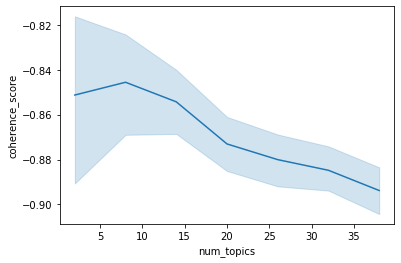

In [125]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [76]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2785
Num Topics = 8  has Coherence Value of 0.3029
Num Topics = 14  has Coherence Value of 0.2887
Num Topics = 20  has Coherence Value of 0.2852
Num Topics = 26  has Coherence Value of 0.2846
Num Topics = 32  has Coherence Value of 0.2914
Num Topics = 38  has Coherence Value of 0.2878


In [89]:
lda[id2word.doc2bow(tokenize("This is a sample document to score with a topic distribution."))]

[(0, 0.02226036),
 (1, 0.022260414),
 (2, 0.022260347),
 (3, 0.022260347),
 (4, 0.022260392),
 (5, 0.0222604),
 (6, 0.022260347),
 (7, 0.35487327),
 (8, 0.022260398),
 (9, 0.022260517),
 (10, 0.022260416),
 (11, 0.022260422),
 (12, 0.3557417),
 (13, 0.022260347),
 (14, 0.022260347)]

## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow

In [78]:
import spacy

nlp = spacy.load('en_core_web_lg')

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/neural/train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable


In [79]:
test = "Ned asked me a question about England today."

In [80]:
doc = nlp(test)

for token in doc:
    print(token.text, token.lemma_, token.pos_)

Ned Ned PROPN
asked ask VERB
me -PRON- PRON
a a DET
question question NOUN
about about ADP
England England PROPN
today today NOUN
. . PUNCT


In [81]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Ned PERSON
England GPE
today DATE


In [82]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            yield text

def get_people(docstream):
    
    ppl = []
    
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.lemma_)
                
    return set(ppl)

In [129]:
people = get_people(doc_stream(path))

In [126]:
doc = nlp(next(doc_stream(path)))

In [128]:
doc.ents[0].lemma_

'yesterday'

# Sources

### *References*
* [Andrew Ng et al paper on LDA](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf)
* On [Coherence](https://pdfs.semanticscholar.org/1521/8d9c029cbb903ae7c729b2c644c24994c201.pdf)

### *Resources*

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)